In [ ]:
import pandas as pd
data=pd.read_csv("/content/population.csv")

In [ ]:
data.head(2)

,Rank,State,Capital,Population,% of Total Population,Males,Females,Sex Ratio,Literacy Rate (%),Rural Population,Urban Population,Area (km*km),Density (1/km*km),Decadal Growth (%)
0,1,Uttar Pradesh,Lucknow,199812341,16.50,104480510,95331831,912,67.68,155111022,44470455,240928,828,20.10%
1,2,Maharashtra,Mumbai,112374333,9.28,58243056,54131277,929,82.34,61545441,50827531,307713,365,16.00%


**WE WILL DIVE INTO THE DATASET, MAKE ANY PRE PROCESSINGS IF REQUIRED AND ANALYSE THE RESULTS OF CENSUS 2011**

In [ ]:
data.describe()

,Rank,Population,% of Total Population,Males,Females,Sex Ratio,Literacy Rate (%),Rural Population,Urban Population,Area (km*km),Density (1/km*km)
count,35.000000,3.500000e+01,35.000000,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01,3.500000e+01,35.000000,35.000000
mean,18.000000,3.459203e+07,2.856857,1.780062e+07,1.678422e+07,931.228571,77.940286,2.381866e+07,1.067266e+07,93921.171429,1091.885714
std,10.246951,4.445516e+07,3.671943,2.305551e+07,2.141356e+07,79.883402,8.598837,3.296505e+07,1.360069e+07,103754.363757,2385.458172
min,1.000000,6.447300e+04,0.010000,3.312300e+04,3.135000e+04,618.000000,61.800000,1.412100e+04,5.030800e+04,32.000000,17.000000
25%,9.500000,1.421136e+06,0.115000,7.265260e+05,6.946100e+05,903.500000,71.235000,7.480705e+05,6.418700e+05,9367.500000,160.500000
50%,18.000000,1.678794e+07,1.390000,8.887326e+06,7.800615e+06,946.000000,78.030000,9.134820e+06,4.388756e+06,53483.000000,350.000000
75%,26.500000,6.076749e+07,5.020000,3.122896e+07,2.953854e+07,974.500000,85.950000,3.607023e+07,1.650647e+07,145449.000000,763.000000
max,35.000000,1.998123e+08,16.500000,1.044805e+08,9.533183e+07,1084.000000,94.000000,1.551110e+08,5.082753e+07,342239.000000,11297.000000


In [ ]:
# Print data types of all columns
print(data.dtypes)

Rank                       int64
State                     object
Capital                   object
Population                 int64
% of Total Population    float64
Males                      int64
Females                    int64
Sex Ratio                  int64
Literacy Rate (%)        float64
Rural Population           int64
Urban Population           int64
Area (km*km)               int64
Density (1/km*km)          int64
Decadal Growth (%)        object
dtype: object


In [ ]:
data.isna().sum()

Rank                     0
State                    0
Capital                  1
Population               0
% of Total Population    0
Males                    0
Females                  0
Sex Ratio                0
Literacy Rate (%)        0
Rural Population         0
Urban Population         0
Area (km*km)             0
Density (1/km*km)        0
Decadal Growth (%)       0
dtype: int64

In [ ]:
# Update capital of Jammu and Kashmir
data.loc[data['State'] == 'Jammu and Kashmir', 'Capital'] = 'Srinagar'

**EXPLORATORY DATA ANALYSIS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

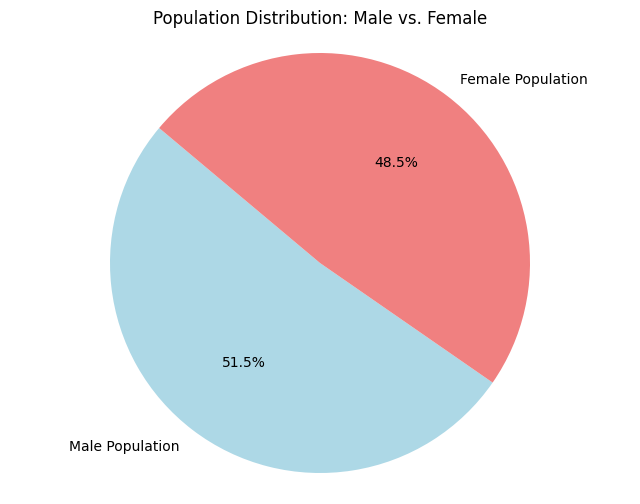

In [ ]:
#MALE VS FEMALE
male_population = data['Males'].sum()
female_population = data['Females'].sum()

# Pie chart
labels = ['Male Population', 'Female Population']
sizes = [male_population, female_population]
colors = ['lightblue', 'lightcoral']
explode = (0, 0)  # no slice explosion

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Population Distribution: Male vs. Female')
plt.show()

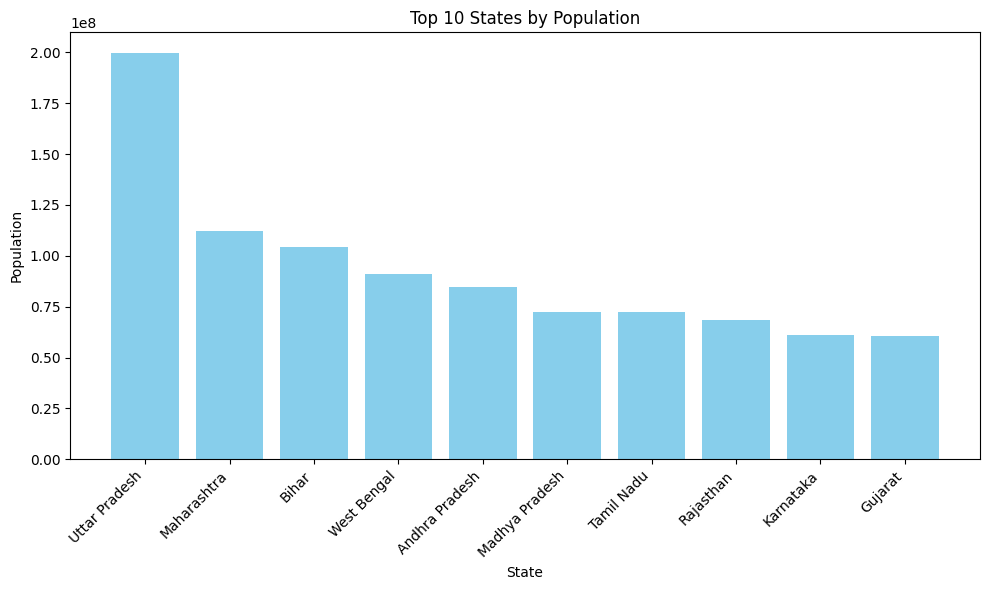

In [ ]:
# Sort data by population in descending order
sorted_data = data.sort_values(by='Population', ascending=False)

# Select top 10 states
top_10_states = sorted_data.head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_states['State'], top_10_states['Population'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Population')
plt.title('Top 10 States by Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

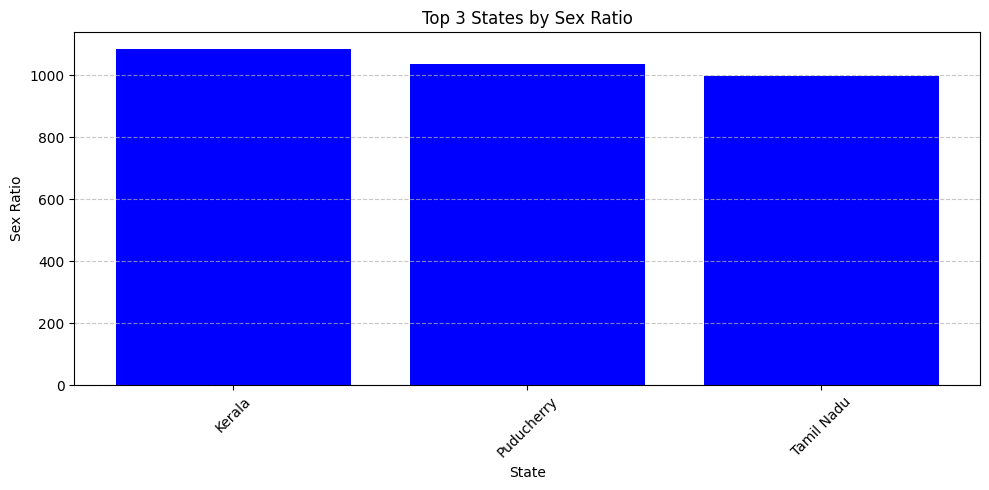

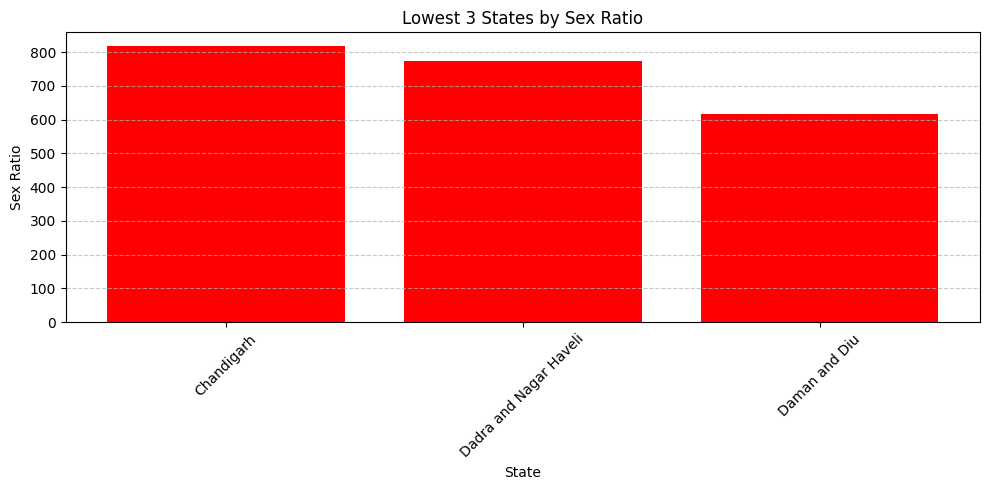

In [ ]:
# Sort the data by sex ratio in descending order
sorted_data = data.sort_values(by='Sex Ratio', ascending=False)

# Select top 3 and lowest 3 states by sex ratio
top3_states = sorted_data.head(3)
lowest3_states = sorted_data.tail(3)

# Plotting top 3 states by sex ratio
plt.figure(figsize=(10, 5))
plt.bar(top3_states['State'], top3_states['Sex Ratio'], color='blue')
plt.title('Top 3 States by Sex Ratio')
plt.xlabel('State')
plt.ylabel('Sex Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting lowest 3 states by sex ratio
plt.figure(figsize=(10, 5))
plt.bar(lowest3_states['State'], lowest3_states['Sex Ratio'], color='red')
plt.title('Lowest 3 States by Sex Ratio')
plt.xlabel('State')
plt.ylabel('Sex Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

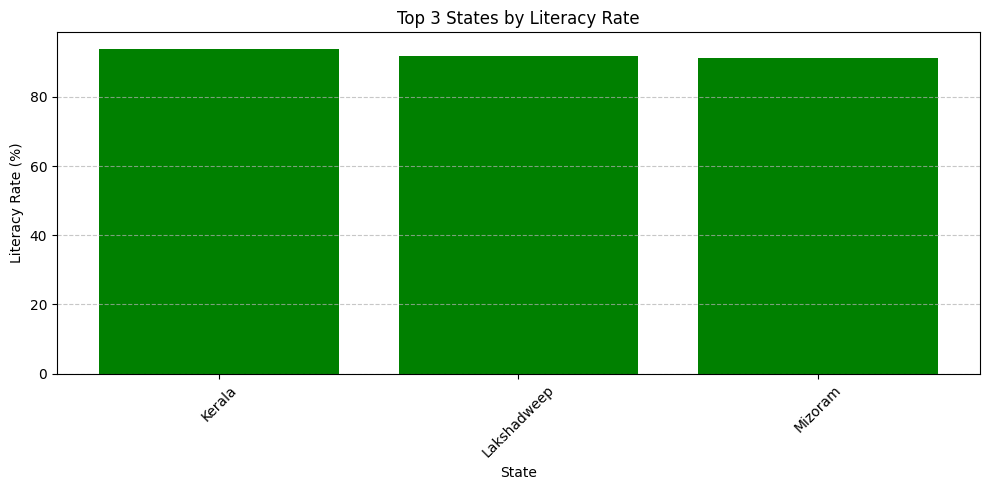

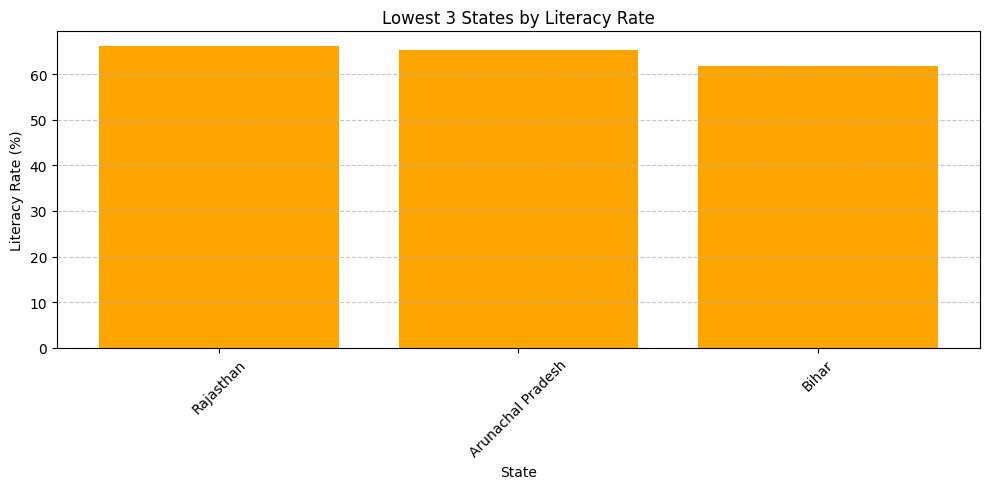

In [ ]:
# Sort the data by literacy rate in descending order
sorted_data = data.sort_values(by='Literacy Rate (%)', ascending=False)

# Select top 3 and lowest 3 states by literacy rate
top3_states = sorted_data.head(3)
lowest3_states = sorted_data.tail(3)

# Plotting top 3 states by literacy rate
plt.figure(figsize=(10, 5))
plt.bar(top3_states['State'], top3_states['Literacy Rate (%)'], color='green')
plt.title('Top 3 States by Literacy Rate')
plt.xlabel('State')
plt.ylabel('Literacy Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting lowest 3 states by literacy rate
plt.figure(figsize=(10, 5))
plt.bar(lowest3_states['State'], lowest3_states['Literacy Rate (%)'], color='orange')
plt.title('Lowest 3 States by Literacy Rate')
plt.xlabel('State')
plt.ylabel('Literacy Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

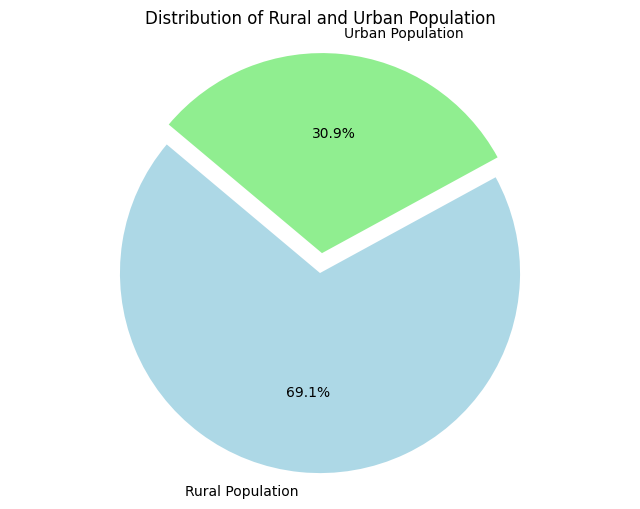

In [ ]:
#RURAL VS URBAN
total_rural_population = data['Rural Population'].sum()
total_urban_population = data['Urban Population'].sum()

# Pie chart
labels = ['Rural Population', 'Urban Population']
sizes = [total_rural_population, total_urban_population]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode the 1st slice (Rural Population)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Rural and Urban Population')
plt.show()

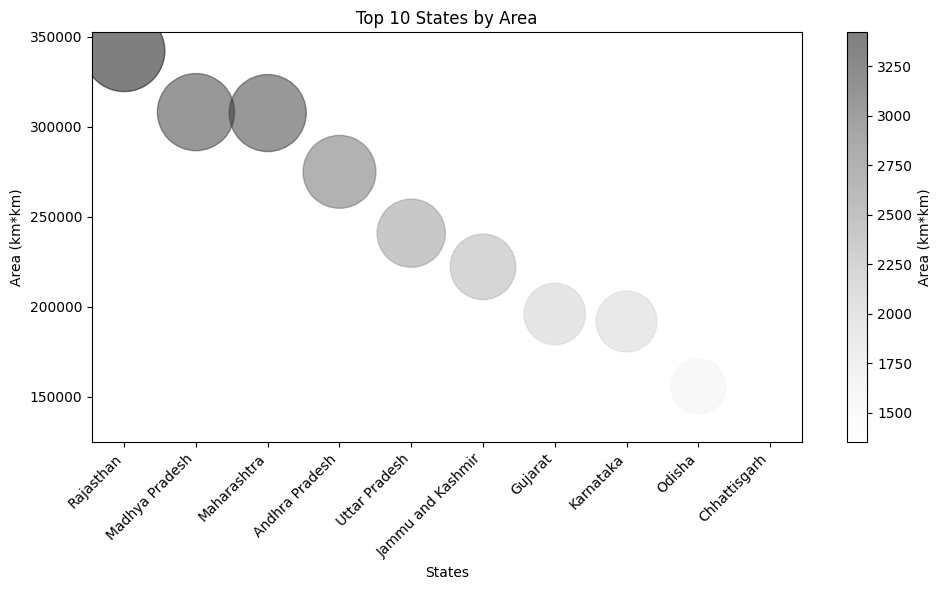

In [ ]:
# Sort the data by area in descending order and select the top 10 states
top_10_states = data.nlargest(10, 'Area (km*km)')

# Extracting data for plotting
states = top_10_states['State']
areas = top_10_states['Area (km*km)']

# Define bubble sizes based on the area values
bubble_sizes = areas * 0.01  # You can adjust the multiplier as needed to scale the bubble sizes

# Scatter plot with variable bubble sizes and colors
plt.figure(figsize=(10, 6))
plt.scatter(states, areas, s=bubble_sizes, c=bubble_sizes, cmap='Greys', alpha=0.5)  # Use the 'c' parameter to set bubble colors
plt.colorbar(label='Area (km*km)')  # Add a colorbar to show the mapping of bubble sizes to colors
plt.title('Top 10 States by Area')
plt.xlabel('States')
plt.ylabel('Area (km*km)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


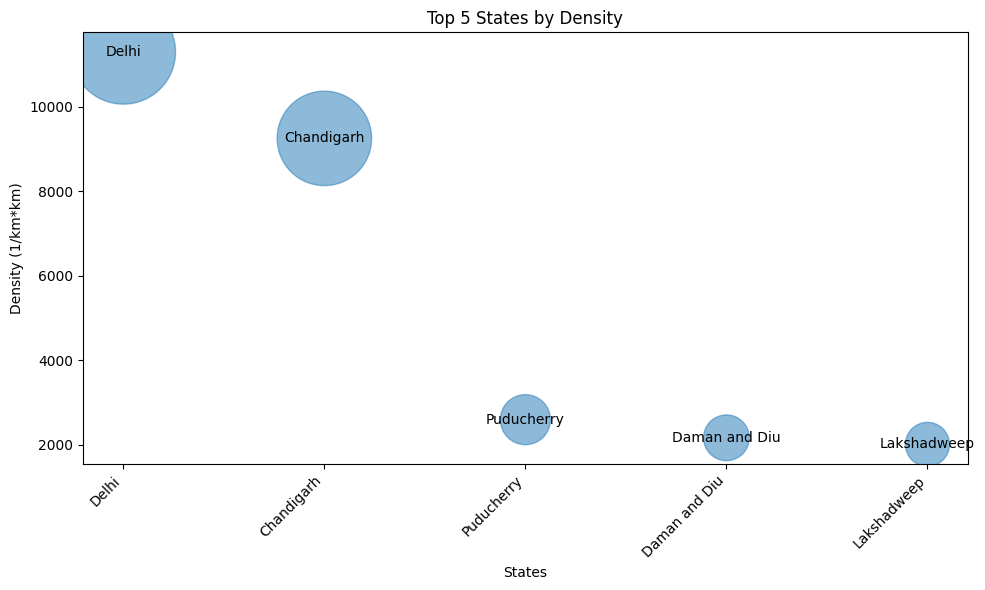

In [ ]:
# Sort the data by density in descending order and select the top 10 states
top_10_states = data.nlargest(5, 'Density (1/km*km)')

# Extracting data for plotting
states = top_10_states['State']
densities = top_10_states['Density (1/km*km)']

# Define bubble sizes based on the density values
bubble_sizes = densities * 0.5  # Adjust the multiplier as needed to scale the bubble sizes

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 6), densities, s=bubble_sizes, alpha=0.5)
for i, txt in enumerate(states):
    plt.annotate(txt, (i + 1, densities.iloc[i]), ha='center', va='center')
plt.title('Top 5 States by Density')
plt.xlabel('States')
plt.ylabel('Density (1/km*km)')
plt.xticks(range(1, 6), states, rotation=45, ha='right')
plt.tight_layout()
plt.show()

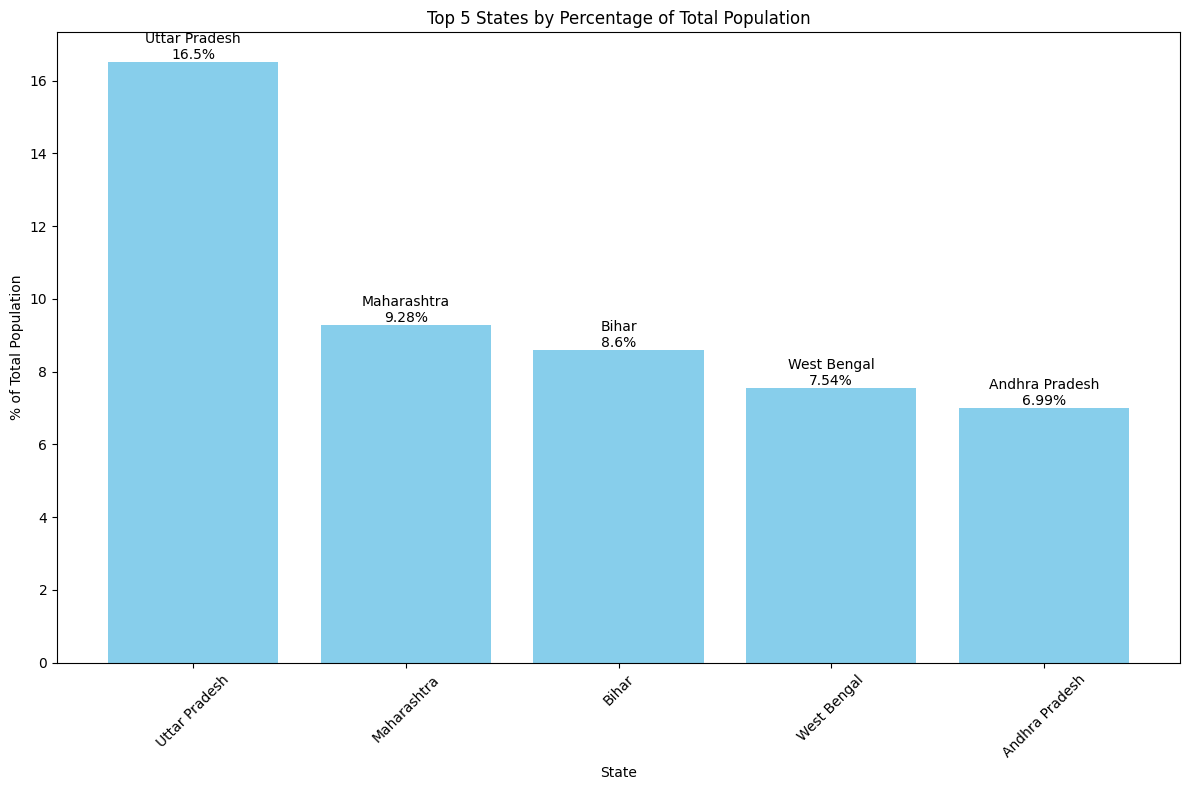

In [ ]:
# Sort the data by '% of Total Population' in descending order and select the top 5 states
top_states = data.sort_values(by='% of Total Population', ascending=False).head(5)

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(top_states['State'], top_states['% of Total Population'], color='skyblue')

# Add annotations with state name and percentage of total population on top of each bar
for bar, state, percentage in zip(bars, top_states['State'], top_states['% of Total Population']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{state}\n{percentage}%",
             ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('State')
plt.ylabel('% of Total Population')
plt.title('Top 5 States by Percentage of Total Population')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Scatter plot with state names showing on hover
fig = px.scatter(data, x='Population', y='Literacy Rate (%)', title='Population vs. Literacy Rate', hover_data=['State'])
fig.update_layout(xaxis_title='Population', yaxis_title='Literacy Rate (%)')

fig.show()

**CONCLUSIONS:**

1. POPULATION COMPRISE ALMOST SAME RATIO OF MALES AND FEMALES. BESIDES THAT KERELA, TAMIL NADU, PUDUCHERRY HAS HIGH SEX RATIO AND CHANDIGARH, DAMAN AND DIU, DADAR AND NAGAR HAVELI HAS LOWEST.

2. AMONG ALL STATES, UTTAR PRADESH, MAHARASHTRA, BIHAR HAS HIGHEST POPULATION. TOP 5 STATE COMPRISE ALMOST 49% OF POPUALTION.

3.   KERELA, LAKSHDWEEP AND MIZORAM SHOWED POSITIVE STATISTICS REGARDING LITERACY RATE BUT RAJASTHAN, ARUNACHAL PRADESH, BIHAR SHOWED A SIGN OF CONCERN.

4.   STATES SUCH AS RAJASTHAN, MP, UP ETC HAS HIGH AREA AMONG ALL STATES.
BUT DENSITY WISE DELHI, CHANDIGARH HAVE DENSITY SHOWING THAT THEY ARE TOO MUCH POPULATED AS COMPARED TO AREA AVAILABLE

5.   MORE THAN HALF OF THE POPULATION LIVES IN RURAL AREAS.




